In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

In [5]:
f = open('../../dataset/clickbait_dataset/vectorized_roberta10k.json','r')
data = json.load(f)

In [8]:
X=[]
Y=[]
T=[]
ID=[]
for x in data:
    ID.append(x)
    # T.append(data[x][0])
    Y.append(data[x][0])
    X.append(data[x][1])

In [9]:
# put ratio here
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=0)


In [10]:
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print("For ", str(test_size*100),"% test size")
print("MSE: ",mean_squared_error(Y_test,Y_pred))
print('Var: ',reg.score(X_test, Y_test))


For  20.0 % test size
MSE:  0.03330363804682428
Var:  0.4531132965662946


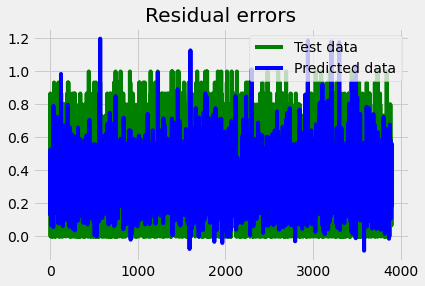

In [15]:
plt.plot(Y_test,color = "green", label = 'Test data')
plt.plot(reg.predict(X_test),color = "blue",  label = 'Predicted data')
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

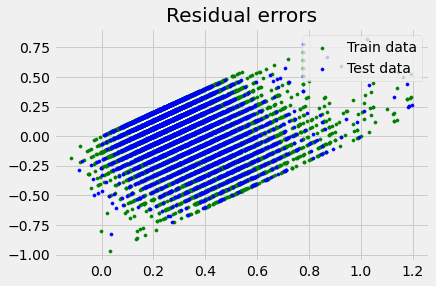

In [16]:

plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - Y_train,color = "green", s = 10, label = 'Train data')
plt.scatter(reg.predict(X_test), reg.predict(X_test) - Y_test,color = "blue", s = 10, label = 'Test data')
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()